In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q1: Importance Sampling for Marginal Likelihoods

1. $p(y) = \int p(y|x)p(x) dx = \int \mathcal{N}(y;x,1)\mathcal{N}(x;0,1)=\mathcal{N}(y;0,1^{2}+1^{2})=\mathcal{N}(y;0,2)=\frac{1}{\sqrt{4\pi}}e^{-\frac{x^{2}}{4}}$

In [72]:
def p(x, mu, sigma):
    return np.exp(-(x - mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

true_value = p(9, 0, np.sqrt(2))
print(true_value)

4.528264739771741e-10


In [392]:
# 2. MC estimator
N_array = np.array([10, 100, 1000, 10000, 100000])
RAE_array_MC = np.array([])

for i in range(len(N_array)):
    N = N_array[i]
    x = np.random.normal(0, 1, N)
    I_est_mc = (1/N) * np.sum(p(9, x, 1))
    RAE = abs(I_est_mc - true_value) / abs(true_value)
    RAE_array_MC = np.append(RAE_array_MC, RAE)

Text(0.5, 1.0, 'Plot of RAE w.r.t. N for MC estimator')

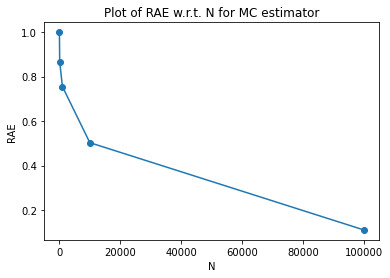

In [393]:
plt.plot(N_array, RAE_array_MC, 'o-')
plt.xlabel('N')
plt.ylabel('RAE')
plt.title('Plot of RAE w.r.t. N for MC estimator')

In [5]:
# 3. IS estimator
def q(x):
    return np.exp(-(x - 6)**2/2)/(np.sqrt(2*np.pi))

def w(x):
    return p(x, 0, 1) / q(x)

RAE_array_IS = np.array([])

for i in range(len(N_array)):
    N = N_array[i]
    x = np.zeros(N)
    weights = np.zeros(N)
    for j in range(N):
        x[j] = np.random.normal(6, 1, 1)
        weights[j] = w(x[j])
    I_est_IS = (1/N) * np.sum(weights * p(9, x, 1))
    RAE = abs(I_est_IS - true_value) / abs(true_value)
    RAE_array_IS = np.append(RAE_array_IS, RAE)

Text(0.5, 1.0, 'Plot of RAE w.r.t. N for IS estimator')

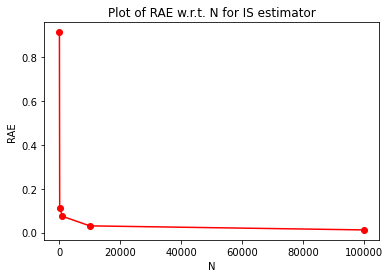

In [56]:
plt.plot(N_array, RAE_array_IS, 'o-', color='red')
plt.xlabel('N')
plt.ylabel('RAE')
plt.title('Plot of RAE w.r.t. N for IS estimator')

Text(0.5, 1.0, 'Plot of RAE w.r.t. N for MC and IS estimator')

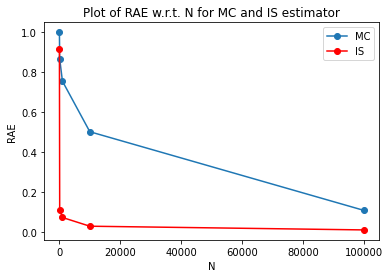

In [395]:
plt.plot(N_array, RAE_array_MC, 'o-', label='MC')
plt.plot(N_array, RAE_array_IS, 'o-', color='red', label='IS')
plt.xlabel('N')
plt.ylabel('RAE')
plt.legend()
plt.title('Plot of RAE w.r.t. N for MC and IS estimator')

## Q2: Metropolis-Hastings for 1D Source Localisation

In [444]:
s = np.array([-1, 2, 5])
y = np.array([4.44, 2.51, 0.73])

def p(x, mu, sigma):
    return np.exp(-(x - mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

def p_bar(x, sigma_y):
    return p(y[0], abs(x - s[0]), sigma_y) * p(y[1], abs(x - s[1]), sigma_y) * p(y[2], abs(x - s[2]), sigma_y)

def MH(N, X_0, sigma_y, sigma_q):
    sample = np.array([X_0])
    for i in range(N):
        X_1 = np.random.normal(X_0, sigma_q, 1)
        u = np.random.uniform(0, 1)
        a = (p(X_1, 0, 10) * p_bar(X_1, sigma_y)) / (p(X_0, 0, 10) * p_bar(X_0, sigma_y))
        if u <= a:
            X_0 = X_1
        sample = np.append(sample, X_0)
    return sample

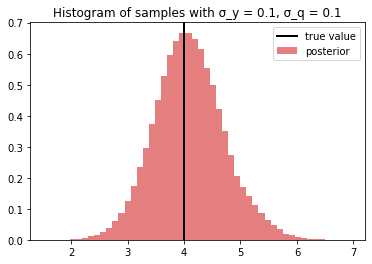

In [486]:
# sigma_y = 1, sigma_q = 0.1
sample = MH(400000, 10, 1, 0.1)
burnin = 2000
plt.clf()
plt.axvline(x = 4, color='k', label='true value', linewidth=2)
plt.hist(sample[burnin:], bins=50, density=True, label='posterior', alpha=0.5, color=[0.8, 0, 0])
plt.title('Histogram of samples with σ_y = 0.1, σ_q = 0.1')
plt.legend()
plt.show()

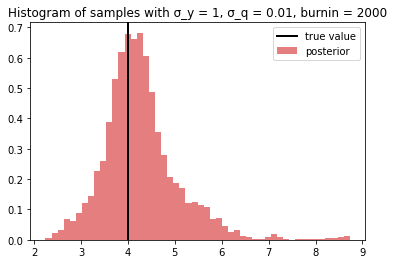

In [490]:
# sigma_y = 1, sigma_q = 0.01
sample = MH(400000, 10, 1, 0.01)
burnin = 2000
plt.clf()
plt.axvline(x = 4, color='k', label='true value', linewidth=2)
plt.hist(sample[burnin:], bins=50, density=True, label='posterior', alpha=0.5, color=[0.8, 0, 0])
plt.title('Histogram of samples with σ_y = 1, σ_q = 0.01, burnin = 2000')
plt.legend()
plt.show()

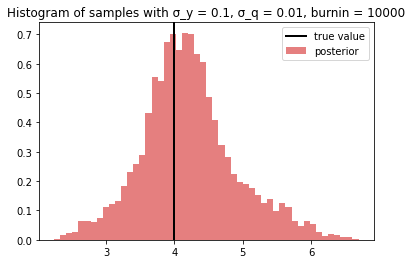

In [489]:
burnin = 10000
plt.clf()
plt.axvline(x = 4, color='k', label='true value', linewidth=2)
plt.hist(sample[burnin:], bins=50, density=True, label='posterior', alpha=0.5, color=[0.8, 0, 0])
plt.title('Histogram of samples with σ_y = 1, σ_q = 0.01, burnin = 10000')
plt.legend()
plt.show()

<ipython-input-444-0276b63a607c>:15: RuntimeWarning: invalid value encountered in true_divide
  a = (p(X_1, 0, 10) * p_bar(X_1, sigma_y)) / (p(X_0, 0, 10) * p_bar(X_0, sigma_y))


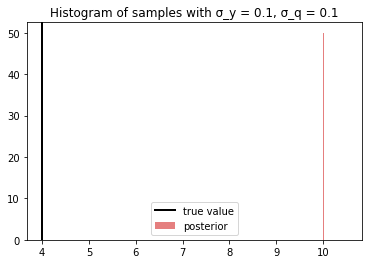

In [491]:
# sigma_y = 0.1, sigma_q = 0.1
y = np.array([5.01, 1.97, 1.02])
sample = MH(400000, 10, 0.1, 0.1)
burnin = 2000
plt.clf()
plt.axvline(x = 4, color='k', label='true value', linewidth=2)
plt.hist(sample[burnin:], bins=50, density=True, label='posterior', alpha=0.5, color=[0.8, 0, 0])
plt.title('Histogram of samples with σ_y = 0.1, σ_q = 0.1')
plt.legend()
plt.show()